# “With four parameters I can fit an elephant, and with five I can make him wiggle his trunk” – John von Neumann

Although with a little bit of cheating (4 complex parameters = 8 real parameters), but here is an elephant.

References:
- https://aapt.scitation.org/doi/10.1119/1.3254017
- https://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/
- https://debris.glaciology.net/2015/09/25/sea-level-the-moon-and-frankenstein/

In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

In [4]:
def elephant(t, p1, p2, p3, p4):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')
 
    Cx[1] = p1.real*1j
    Cx[2] = p1.imag*1j
    Cx[3] = p2.real
    Cx[5] = p2.imag
 
    Cy[1] = p3
    Cy[2] = p4.real*1j
    Cy[3] = p4.imag*1j
 
    x = fourier(t,Cx)
    y = fourier(t,Cy)
    
    eye = (-20.0, 20.0)
    x = np.append(x, eye[0])
    y = np.append(y, eye[1])
 
    return x,y

In [5]:
p1, p2, p3, p4 = (50 + 18j, 12 - 14j, -60-30j, 8 - 10j)

In [6]:
def plot_elephant(p1=p1, p2=p2, p3=p3, p4=p4, start=0, stop=2*np.pi):
    x, y = elephant(np.linspace(start,stop,1000), p1, p2, p3, p4)
    obj = plt.plot(y,-x,'.')
    plt.show()
    return obj

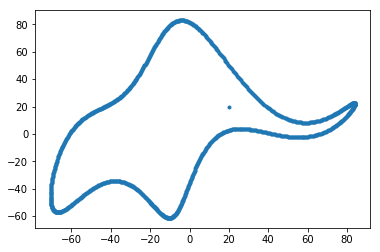

In [7]:
plot_elephant(p1,p2,p3,p4)

## Wiggling its trunk

In [8]:
def plot_elephant_body():
    start = 0.4+1.3*np.pi
    stop = 2*np.pi+0.9*np.pi
    obj = plot_elephant(start=start, stop=stop)
    return obj

In [9]:
def plot_elephant_trunk():
    start = 2*np.pi+0.9*np.pi
    stop = 0.4+3.3*np.pi
    obj = plot_elephant(start=start, stop=stop)
    return obj